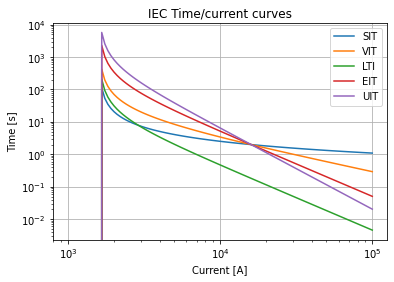

In [8]:
# IEC 60255 Time Current Curves

from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IEC_Curve(namedtuple('IEC_Curve', 'name k alpha beta')):
    def td(self, T, Is):
        """
        The td(I) function for a given IEC curve, time dial setting, and
        current setting.
        """
        return lambda I: self.k * T / self.beta / (((I / Is)**self.alpha) - 1)

SIT = IEC_Curve('SIT', k=0.14, alpha=0.02, beta=2.97)   # Standard inverse / A
VIT = IEC_Curve('VIT', k=13.5, alpha=1, beta=1.5)       # Very inverse / B
LTI = IEC_Curve('LTI', k=120, alpha=2, beta=13.33)      # Long time inverse / B
EIT = IEC_Curve('EIT', k=80, alpha=2, beta=0.808)       # Extremely inverse / C
UIT = IEC_Curve('UIT', k=315.2, alpha=2.5, beta=1)      # Ultra inverse

I = np.logspace(3, 5, 100)
# print(I)
for curve in (SIT, VIT, LTI, EIT, UIT):
    plt.loglog(I, curve.td(T=2, Is=1600)(I), label=curve.name)
plt.xlabel("Current [A]")
plt.ylabel("Time [s]")
plt.title("IEC Time/current curves")
plt.grid()
plt.legend()
plt.show()

